In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [46]:
def hmc_scalar(U, gradU, m, dt, nstep, x):
    p = np.random.randn() * np.sqrt(m)
    oldX = x
    oldEnergy = p * (1./m) * p / 2 + U(x)
    for i in range(nstep):
        p -= gradU(x) * dt/2.
        x += p/m * dt
        p -= gradU(x) * dt/2.
    newEnergy = p * (1./m) * p / 2 + U(x)
    if np.random.random() > np.exp(oldEnergy - newEnergy): # Metropolis-Hastings
        x = oldX
    return x

In [47]:
def U(x):
    return -2. * x**2 + x**4

def gradU_scalar(x):
    return -4. * x + 4. * x**3 + np.random.randn() * 2.

def gradU_perfect(x):
    return -4. * x + 4. * x**3

In [48]:
nsample = 80000
xStep = 0.1
m = 1.
C = 3.
dt = 0.1
nstep = 50
V = 4.

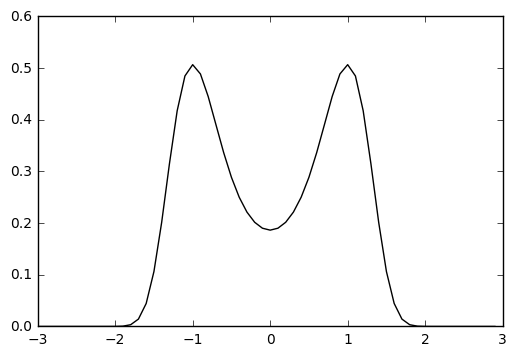

In [49]:
xGrid = np.arange(-3., 3., xStep)
y = np.exp( - U(xGrid) )
y = y / (np.sum(y) * xStep)
plt.plot(xGrid,y, '-k')

In [50]:
samples = np.zeros(nsample)
x = 0.
for i in range(nsample):
    x = hmc_scalar( U, gradU_perfect, m, dt, nstep, x )
    samples[i] = x

In [51]:
yhmc = scipy.stats.histogram(samples, numbins=len(xGrid), defaultlimits=(-3.,3.))[0]
yhmc = yhmc / (np.sum(yhmc) * xStep)

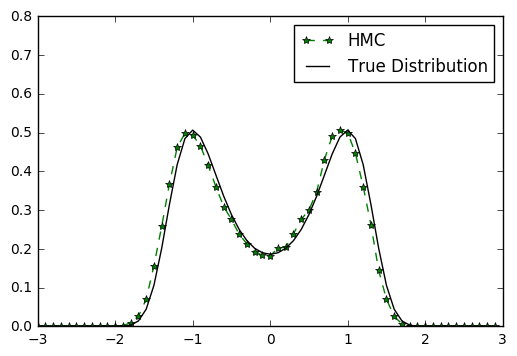

In [52]:
plt.plot(xGrid,yhmc, '*--g', label='HMC')
plt.plot(xGrid,y, '-k', label='True Distribution')
plt.ylim(0.0,0.8)
plt.legend()

## Multi-dimensional case

In [64]:
def hmc_vector(U, gradU, m, dt, nstep, x):
    mean = np.zeros_like(x)
    p = np.random.multivariate_normal(mean, m)
    oldX = x.copy()
    oldEnergy = 0.5 * p.dot(np.linalg.solve(m, p))  + U(x)
    for i in range(nstep):
        p -= gradU(x) * dt/2.
        x += np.linalg.solve(m, p) * dt
        p -= gradU(x) * dt/2.
    newEnergy = 0.5 * p.dot(np.linalg.solve(m, p))  + U(x)
    if np.random.random() > np.exp(oldEnergy - newEnergy): # Metropolis-Hastings
        x = oldX.copy()
    return x.copy()

In [65]:
def U(x):
    return -2. * x**2 + x**4

def gradU_vector(x):
    mean = np.zeros_like(x)
    return -4. * x + 4. * x**3 + np.random.multivariate_normal(mean, np.array([[4.]]))

def gradU_perfect(x):
    return -4. * x + 4. * x**3

In [66]:
nsample = 8000
xStep = 0.1
m = np.array([[1.]])
dt = 0.1
nstep = 50

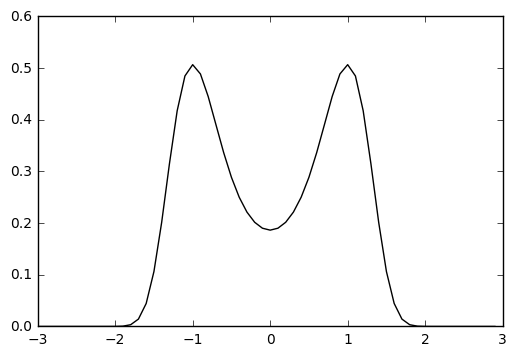

In [67]:
xGrid = np.arange(-3., 3., xStep)
y = np.exp( - U(xGrid) )
y = y / (np.sum(y) * xStep)
plt.plot(xGrid,y, '-k')

In [69]:
samples = np.zeros(nsample)
x = np.array([0.])
for i in range(nsample):
    x = hmc_vector( U, gradU_perfect, m, dt, nstep, x.copy() )
    samples[i] = x.copy()[0]



In [70]:
yhmc = scipy.stats.histogram(samples, numbins=len(xGrid), defaultlimits=(-3.,3.))[0]
yhmc = yhmc / (np.sum(yhmc) * xStep)

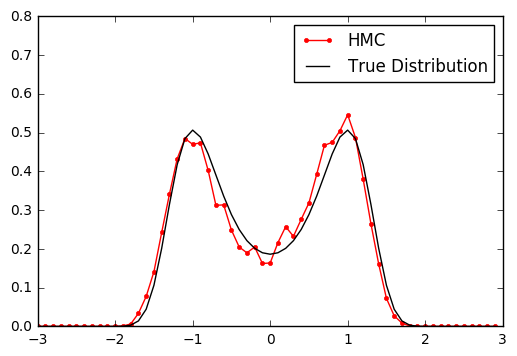

In [71]:
plt.plot(xGrid,yhmc, '.-r', label='HMC')
plt.plot(xGrid,y, '-k', label='True Distribution')
plt.ylim(0.0,0.8)
plt.legend()

## Sample from a multivariate normal distribution, with $U(\theta) = \frac{1}{2}\theta^T \Sigma^{-1} \theta$

In [6]:
def hmc_vector(U, gradU, m, dt, nstep, x):
    mean = np.zeros_like(x)
    p = np.random.multivariate_normal(mean, m)
    oldX = x.copy()
    oldEnergy = 0.5 * p.dot(np.linalg.solve(m, p))  + U(x)
    for i in range(nstep):
        p -= gradU(x) * dt/2.
        x += np.linalg.solve(m, p) * dt
        p -= gradU(x) * dt/2.
    newEnergy = 0.5 * p.dot(np.linalg.solve(m, p))  + U(x)
    if np.random.random() > np.exp(oldEnergy - newEnergy): # Metropolis-Hastings
        x = oldX.copy()
    return x.copy()

In [9]:
def U(x):
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return 0.5 * x.dot( np.linalg.solve(sigma,x))

def gradU_vector(x):
    mean = np.zeros_like(x)
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return np.linalg.solve(sigma,x) + np.random.multivariate_normal(mean, np.diag([2.,2.]))

def gradU_perfect(x):
    mean = np.zeros_like(x)
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return np.linalg.solve(sigma,x)

In [10]:
xGrid = np.linspace(-2., 3., 200)
yGrid = np.linspace(-2., 3., 200)

XGrid, YGrid = np.meshgrid(xGrid, yGrid)

Z = np.zeros((xGrid.shape[0], yGrid.shape[0]))
for i in range(xGrid.shape[0]):
    for j in range(yGrid.shape[0]):
        Z[i,j] = np.exp(-U(np.array([xGrid[i],yGrid[j]])))

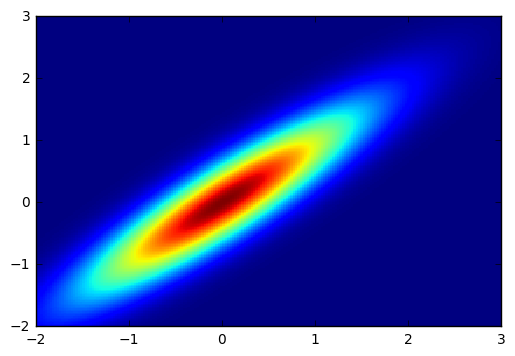

In [12]:
plt.pcolor(XGrid, YGrid, Z)

In [18]:
nsample = 8000
m = np.diag([1.,1.])
dt = 0.1
nstep = 50

In [19]:
samples = []
x = np.array([0.,0.])
for i in range(nsample):
    x = hmc_vector( U, gradU_perfect, m, dt, nstep, x.copy() )
    samples.append(x.copy())

(-2, 3)

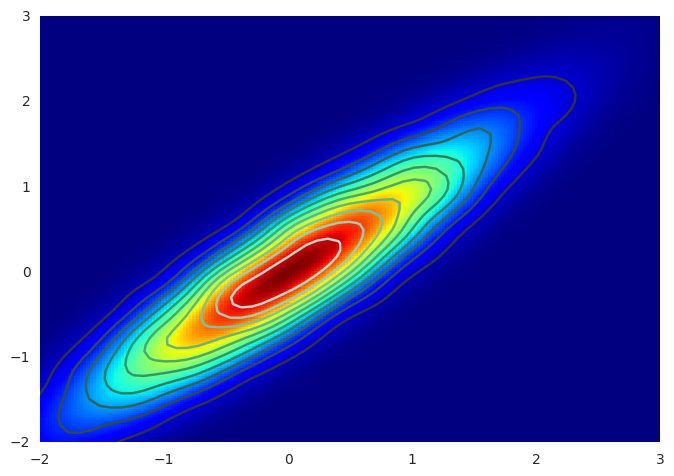

In [31]:
import seaborn as sns
samples = np.array(samples)

plt.pcolor(XGrid, YGrid, Z, cmap='jet')
sns.kdeplot(samples[:,0],samples[:,1])
plt.xlim(-2,3)
plt.ylim(-2,3)

## Sample from a multivariate normal distribution, with $U(\theta) = \frac{1}{2}\theta^T \Sigma^{-1} \theta$, using SGHMC

In [32]:
def sghmc_vector(U, gradU, m, dt, nstep, x, C, V): # this is sigficantly slower than the scalar one.
    mean = np.zeros_like(x)
    p = np.random.multivariate_normal(mean, m)
    B = 0.5 * dt * V
    D = 2. * (C-B) * dt
    for i in range(nstep):
        p += -gradU(x) * dt - C.dot( np.linalg.solve(m, p)) * dt + np.random.multivariate_normal(mean, D)
        x += np.linalg.solve(m, p) * dt
    return x.copy()

In [33]:
def U(x):
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return 0.5 * x.dot( np.linalg.solve(sigma,x))

def gradU_vector(x):
    mean = np.zeros_like(x)
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return np.linalg.solve(sigma,x) + np.random.multivariate_normal(mean, np.diag([2.,2.]))

def gradU_perfect(x):
    mean = np.zeros_like(x)
    sigma = np.array([[1.,0.9],[0.9,1.]])
    return np.linalg.solve(sigma,x)

In [34]:
nsample = 8000
m = np.diag([1.,1.])
C = np.diag([3.,3.])
dt = 0.1
nstep = 50
V = np.diag([2.,2.])

In [35]:
samples = []
x = np.array([0.,0.])
for i in range(nsample):
    x = sghmc_vector( U, gradU_perfect, m, dt, nstep, x.copy(),C,V )
    samples.append(x.copy())

(-2, 3)

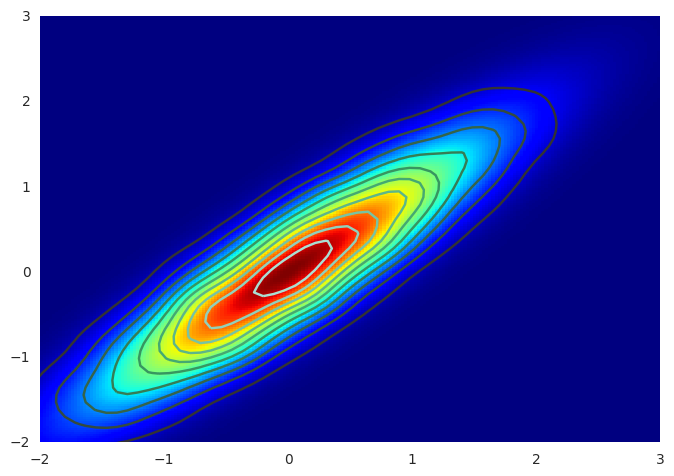

In [36]:
import seaborn as sns

samples = np.array(samples)

plt.pcolor(XGrid, YGrid, Z, cmap='jet')
sns.kdeplot(samples[:,0],samples[:,1])
plt.xlim(-2,3)
plt.ylim(-2,3)